In [1]:
import numpy as np               # to inculude mathematics
import matplotlib.pyplot as plt  # Ploting graph
import pandas as pd              # import & manage datasets 
from datetime import datetime    # for time formation & measurement

In [2]:
# Step 1
## This makes mean of moisture data on the basis of same date
## i.e; multiple observation taken in a single which implies to take mean of whole 
## observations w.r.t same date 
def data_separator_ofSame_date(x, t):
    f_t = list()
    f_x = list()

    for i in t:
        if i not in f_t:
            counter = s = pre = 0
            for j in t:
                if i == j:
                    index = t.index(j, pre)
                    s += x[index]
                    counter += 1
                    pre += 1
            f_x.append(s/counter)  
            f_t.append(i)
    return f_x, f_t

In [3]:
# Step 2: Importing & fullfilling prerequisites the dataset from sites
dataset1 = pd.read_csv("/home/hamza/Desktop/Scube/trends/soil_moisture_historical_device_1( 1Jan19-25Sep19 ).csv")
dataset2 = pd.read_csv("/home/hamza/Desktop/Scube/trends/soil_moisture_historical_device_2(1Jan19-25Sep19).csv")
dataset3 = pd.read_csv("/home/hamza/Desktop/Scube/trends/soil_moisture_historical_device_3(1Jan19-25Sep19).csv")

# UNIX datetime from net sourced data
T1 = dataset1.iloc[:, [0]].values.reshape((-1, )).tolist() # datetime of device 1
T2 = dataset2.iloc[:, [0]].values.reshape((-1, )).tolist() # datetime of device 2
T3 = dataset2.iloc[:, [0]].values.reshape((-1, )).tolist() # datetime of device 3

def unix_time_from_net_source(*args):  #1546300800 >'01-01-2019 12:00 AM'
    datetimes = list(map(lambda n: datetime.utcfromtimestamp(int(n)).strftime('%d-%m-%Y %I:%M %p') , args))
    return [date[:5] for date in datetimes]

T1 = unix_time_from_net_source(*T1)  # '01-01' D-M
T2 = unix_time_from_net_source(*T2)
T3 = unix_time_from_net_source(*T3)

In [4]:
# Step 3: Finalizing moisture data from net for each devices
X1 = dataset1.iloc[:, 2].values.reshape((-1, )).tolist() #  device 1
X2 = dataset2.iloc[:, 2].values.reshape((-1, )).tolist() #  device 2
X3 = dataset2.iloc[:, 2].values.reshape((-1, )).tolist() #  device 3

X1, T1 = data_separator_ofSame_date(X1, T1)
X2, T2 = data_separator_ofSame_date(X1, T1)
X3, T3 = data_separator_ofSame_date(X1, T1)

In [6]:
# Step 2: Importing & fullfilling prerequisites the dataset from portal
dataset_portal1 = pd.read_csv("/home/hamza/Desktop/Scube/trends/device_1_data_from_portal.csv")
dataset_portal2 = pd.read_csv("/home/hamza/Desktop/Scube/trends/device_2_data_from_portal.csv")
dataset_portal3 = pd.read_csv("/home/hamza/Desktop/Scube/trends/device_3_data_from_portal.csv")

# Separating date from portal sourced data
t1 = dataset_portal1.iloc[:, [1]].values.reshape((-1, )).tolist() # datetime of device 1
t2 = dataset_portal2.iloc[:, [1]].values.reshape((-1, )).tolist() # datetime of device 2
t3 = dataset_portal3.iloc[:, [1]].values.reshape((-1, )).tolist() # datetime of device 3

def date_separator_from_portal(*args): # '07-Feb-2019 06:34 am' > datetime.date(2019, 2, 7)
    datetimes = list(map(lambda arg: datetime.strptime(arg, "%d-%b-%Y %I:%M %p").strftime("%d-%m-%Y %I:%M %p"), args))
    return [date[:5] for date in datetimes]
t1 = date_separator_from_portal(*t1)  # t1[0].date() > datetime.date(2019, 2, 7)
t2 = date_separator_from_portal(*t2)
t3 = date_separator_from_portal(*t3)

In [7]:
# Step 3: Finalizing moisture data for each devices from portal
# each data divided by 100 to equalize with net data
x1 = (dataset_portal1.iloc[:, 5].values/100).tolist() # portal device 1
x2 = (dataset_portal2.iloc[:, 5].values/100).tolist() # portal device 2
x3 = (dataset_portal3.iloc[:, 5].values/100).tolist() # portal device 3

x1, t1 = data_separator_ofSame_date(x1, t1)
x2, t2 = data_separator_ofSame_date(x2, t2)
x3, t3 = data_separator_ofSame_date(x3, t3)

In [8]:
# Step 4: Elimatiation of data which are not matched with net sourced & portal devices
def both_contain(moreDates, lessDates, moreData, lessData):
    dates = []
    values_more = []
    values_less = []
    for i in moreDates:
        if i in lessDates:
            index = moreDates.index(i)
            dates.append(i)
            values_more.append(moreData[index])
    for j in lessDates:
        if j in moreDates:
            index = lessDates.index(j)
            dates.append(j)
            values_less.append(lessData[index])           
    
    return list(set(dates)), values_more, values_less

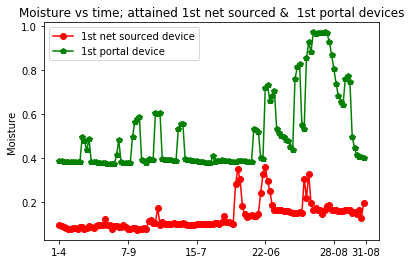

In [9]:
# Visualizing graphs

# Step 6: Visualising the net sourced & portal data devices 1
Dates1, datum_net1, datum_portal1  = both_contain(T1, t1, X1, x1)
Dates1.sort()
plt.plot(Dates1, datum_net1, 'ro-', label="1st net sourced device",)
plt.plot(Dates1, datum_portal1,  'gp-', label="1st portal device",)
plt.legend(loc='best')
plt.title('Moisture vs time; attained 1st net sourced &  1st portal devices')
# plt.xlabel('Time')
plt.xticks([0, 30, 60, 90, 120, 134],
           ["1-4", "7-9", "15-7", "22-06", "28-08", "31-08"])
plt.ylabel('Moisture')
plt.show()

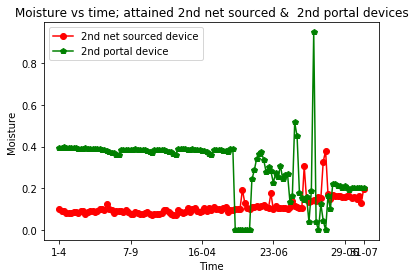

In [10]:
# Step 6: Visualising the net sourced & portal data devices 1
Dates2, datum_net2, datum_portal2  = both_contain(T2, t2, X2, x2)
Dates2.sort()
plt.plot(Dates2, datum_net2, 'ro-', label="2nd net sourced device",)
plt.plot(Dates2, datum_portal2,  'gp-', label="2nd portal device",)
plt.legend(loc='best')
plt.title('Moisture vs time; attained 2nd net sourced &  2nd portal devices')
plt.xlabel('Time')
plt.xticks([0, 30, 60, 90, 120, 128],
           ["1-4", "7-9", "16-04", "23-06", "29-06", "31-07"])
plt.ylabel('Moisture')
plt.show()

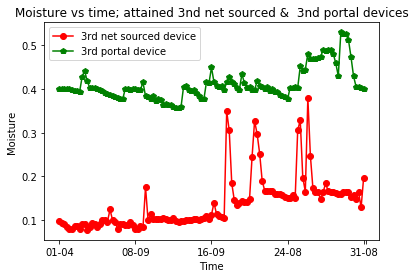

In [11]:
# Step 6: Visualising the net sourced & portal data devices 
Dates3, datum_net3, datum_portal3  = both_contain(T3, t3, X3, x3)
Dates3.sort()
plt.plot(Dates3, datum_net3, 'ro-', label="3rd net sourced device",)
plt.plot(Dates3, datum_portal3,  'gp-', label="3rd portal device",)
plt.legend(loc='best')
plt.title('Moisture vs time; attained 3nd net sourced &  3nd portal devices')
plt.xlabel('Time')
plt.xticks([0, 30, 60, 90, 120, 121],
           ["01-04", "08-09", "16-09", "24-08", "31-08"])
plt.ylabel('Moisture')
plt.show()